# Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in projects 1 and 2.

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")
import sklearn.linear_model


In [10]:
df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna() 
print (df.head())

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 399
Data columns (total 4 columns):
admit       397 non-null int64
gre         397 non-null float64
gpa         397 non-null float64
prestige    397 non-null float64
dtypes: float64(3), int64(1)
memory usage: 15.5 KB


## Part 1. Frequency Tables

#### 1. Let's create a frequency table of our variables

In [11]:
# frequency table for prestige and whether or not someone was admitted

# Find prestige's frequency and if admitted or not
new_df = df.groupby('prestige')['admit'].value_counts()
print (new_df)

prestige  admit
1.0       1        33
          0        28
2.0       0        95
          1        53
3.0       0        93
          1        28
4.0       0        55
          1        12
Name: admit, dtype: int64


## Part 2. Return of dummy variables

#### 2.1 Create class or dummy variables for prestige 

          prestige       gre       gpa     admit
prestige  1.000000 -0.124533 -0.060976 -0.243563
gre      -0.124533  1.000000  0.382408  0.181202
gpa      -0.060976  0.382408  1.000000  0.174116
admit    -0.243563  0.181202  0.174116  1.000000
AxesSubplot(0.125,0.125;0.62x0.755)


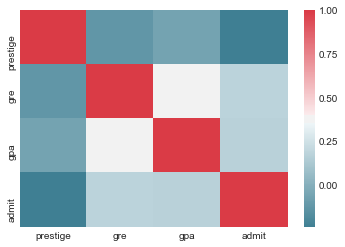

In [16]:
#Comparing variables for multicollinearity
#No high correlations found between variables but this is a singular matrix so we can have multicollinarity issues

cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlations = df[['prestige', 'gre', 'gpa','admit']].corr()
print (correlations)
print (sns.heatmap(correlations, cmap=cmap))



In [17]:
# dummify rank
dummy_ranks = pd.get_dummies(df['prestige'], prefix='prestige')
print (dummy_ranks.head())



   prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0             0             0             1             0
1             0             0             1             0
2             1             0             0             0
3             0             0             0             1
4             0             0             0             1


#### 2.2 When modeling our class variables, how many do we need? 



Answer: We normally need n-1 dummy variables so in this case we need 3 out of 4 variables because the fourth variable is implied in the three previous and therefore redundant

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [18]:
cols_to_keep = ['admit', 'gre', 'gpa']
handCalc = df[cols_to_keep].join(dummy_ranks.loc[:, 'prestige_1':])
print (handCalc.head())

   admit    gre   gpa  prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61             0             0             1             0
1      1  660.0  3.67             0             0             1             0
2      1  800.0  4.00             1             0             0             0
3      1  640.0  3.19             0             0             0             1
4      0  520.0  2.93             0             0             0             1


In [21]:
#crosstab prestige 1 admission 
# frequency table cutting prestige and whether or not someone was admitted

print (pd.crosstab(df['admit'], df['prestige'], rownames=['admit']))


prestige  1.0  2.0  3.0  4.0
admit                       
0          28   95   93   55
1          33   53   28   12


#### 3.1 Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college

In [42]:
def logit_func(odds):
    # uses a float (odds) and returns back the log odds (logit)
    return np.log(odds)

odds_set = [1.33/1]


def sigmoid_func(logit):
    # uses a float (logit) and returns back the probability
    return 1. / (1 + np.exp(-logit))

In [44]:
for odds in odds_set:
    print (sigmoid_func(logit_func(odds)))

0.5708154506437768


#### 3.2 Now calculate the odds of admission if you did not attend a #1 ranked college

In [45]:
def logit_func(odds):
    # uses a float (odds) and returns back the log odds (logit)
    return np.log(odds)

odds_set = [1.28]


def sigmoid_func(logit):
    # uses a float (logit) and returns back the probability
    return 1. / (1 + np.exp(-logit))

In [46]:
for odds in odds_set:
    print (sigmoid_func(logit_func(odds)))

0.5614035087719298


#### 3.3 Calculate the odds ratio

In [47]:
# odds ratios only
print (np.exp(result.params))

gre         1.001462
gpa         0.996154
prestige    0.513852
dtype: float64


#### 3.4 Write this finding in a sentenance: 

Answer: 

#### 3.5 Print the cross tab for prestige_4

KeyError: 'prestige_4'

#### 3.6 Calculate the OR 

In [48]:
train_cols = df.columns[1:]
# Index([gre, gpa, prestige_2, prestige_3, prestige_4], dtype=object)

logit = sm.Logit(df['admit'], df[train_cols])

# fit the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.586294
         Iterations 5


In [49]:
 print (result.summary())

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            2
Date:                Tue, 10 Jul 2018   Pseudo R-squ.:                 0.06175
Time:                        11:56:27   Log-Likelihood:                -232.76
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 2.225e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gre            0.0015      0.001      1.404      0.160      -0.001       0.004
gpa           -0.0039      0.201     -0.019      0.985      -0.398       0.390
prestige      -0.6658      0.121     -5.502      0.0

In [50]:
# look at the confidence interval of each coeffecient
print (result.conf_int())

                 0         1
gre      -0.000578  0.003501
gpa      -0.398135  0.390429
prestige -0.903018 -0.428623


#### 3.7 Write this finding in a sentence

Answer:

## Part 4. Analysis

In [51]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.loc[:, 'prestige_2':])
print (data.head())

   admit    gre   gpa  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61             0             1             0
1      1  660.0  3.67             0             1             0
2      1  800.0  4.00             0             0             0
3      1  640.0  3.19             0             0             1
4      0  520.0  2.93             0             0             1


We're going to add a constant term for our Logistic Regression. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [52]:
# manually add the intercept
data['intercept'] = 1.0

#### 4.1 Set the covariates to a variable called train_cols

In [53]:
train_cols = data.columns[1:]

#### 4.2 Fit the model

In [54]:
logit = sm.Logit(data['admit'], data[train_cols])

result = logit.fit()


Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


#### 4.3 Print the summary results

In [55]:
print (result.summary())

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Tue, 10 Jul 2018   Pseudo R-squ.:                 0.08166
Time:                        11:57:14   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
gre              0.0022      0.001      2.028      0.043    7.44e-05       0.004
gpa              0.7793      0.333      2.344      0.019       0.128       1.431
prestige_2.0    -0.6801      0.317     -2.14

#### 4.4 Calculate the odds ratios of the coeffiencents and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params
        
           conf.columns = ['2.5%', '97.5%', 'OR']

In [56]:
print (np.exp(result.params))

gre             1.002221
gpa             2.180027
prestige_2.0    0.506548
prestige_3.0    0.262192
prestige_4.0    0.211525
intercept       0.020716
dtype: float64


In [59]:
# odds ratios and 95% CI
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print (np.exp(conf))

                  2.5%     97.5%        OR
gre           1.000074  1.004372  1.002221
gpa           1.136120  4.183113  2.180027
prestige_2.0  0.272168  0.942767  0.506548
prestige_3.0  0.133377  0.515419  0.262192
prestige_4.0  0.093329  0.479411  0.211525
intercept     0.002207  0.194440  0.020716


#### 4.5 Interpret the OR of Prestige_2

Answer: 

#### 4.6 Interpret the OR of GPA

Answer: 

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values. This will allow us to see how the predicted probability of admission increases/decreases across different variables. First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa". This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [73]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [86]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print (gres)
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print (gpas)
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])


#define the cartesian function
def cartesian(arrays, out=None):
    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

n = np.prod([x.size for x in arrays])
if out is None:
    out = np.zeros([n, len(arrays)], dtype=dtype)

m = n / arrays[0].size
out[:,0] = np.repeat(arrays[0], m)
if arrays[1:]:
    cartesian(arrays[1:], out=out[0:m,1:])
for j in xrange(1, arrays[0].size):
    out[j*m:(j+1)*m,1:] = out[0:m,1:]
return out



[220.         284.44444444 348.88888889 413.33333333 477.77777778
 542.22222222 606.66666667 671.11111111 735.55555556 800.        ]
[2.26       2.45333333 2.64666667 2.84       3.03333333 3.22666667
 3.42       3.61333333 3.80666667 4.        ]


NameError: name 'arrays' is not defined

#### 5.1 Recreate the dummy variables

In [87]:
# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))

# recreate the dummy variables
combos.columns = ['gre', 'gpa', 'prestige', 'intercept']
dummy_ranks = pd.get_dummies(combos['prestige'], prefix='prestige')
dummy_ranks.columns = ['prestige_1', 'prestige_2', 'prestige_3', 'prestige_4']

ValueError: Length mismatch: Expected axis has 0 elements, new values have 4 elements

In [88]:
# keep only what we need for making predictions
cols_to_keep = ['gre', 'gpa', 'prestige', 'intercept']
combos = combos[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])

KeyError: "['gre' 'gpa' 'prestige' 'intercept'] not in index"

#### 5.2 Make predictions on the enumerated dataset

In [90]:
# make predictions on the enumerated dataset
combos['admit_pred'] = result.predict(combos[train_cols])

print (combos.head())

KeyError: "Index(['gre', 'gpa', 'prestige_2.0', 'prestige_3.0', 'prestige_4.0',\n       'intercept'],\n      dtype='object') not in index"

#### 5.3 Interpret findings for the last 4 observations

Answer: 

## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.

In [94]:
def isolate_and_plot(variable):
      # isolate gre and class rank
      grouped = pd.pivot_table(combos, values=['admit_pred'], index=[variable, 'prestige'],
                  aggfunc=np.mean)
      # make a plot
      colors = 'rbgyrbgy'
      for col in combos.prestige.unique():
          plt_data = grouped.ix[grouped.index.get_level_values(1)==col]
          pl.plot(plt_data.index.get_level_values(0), plt_data['admit_pred'], color=colors[int(col)])

      pl.xlabel(variable)
      pl.ylabel("P(admit=1)")
      pl.legend(['1', '2', '3', '4'], loc='upper left', title='Prestige')
      pl.title("Prob(admit=1) isolating " + variable + " and presitge")
      pl.show()

isolate_and_plot('gre')
isolate_and_plot('gpa')


KeyError: 'admit_pred'